<a href="https://colab.research.google.com/github/RoushanKhalid/NLP_101/blob/main/2_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install matplotlib seaborn scikit-learn pandas numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding

In [2]:
# Sample sentences
sentences = [
    "I love NLP",
    "NLP is fun",
    "I love Python"
]

# Step 1: Lowercase and split words
words = []
for sentence in sentences:
    words += sentence.lower().split()

# Step 2: Get unique words (vocabulary)
vocab = sorted(set(words))
print("Vocabulary:", vocab)

# Step 3: One-hot encode each sentence
for sentence in sentences:
    tokens = sentence.lower().split()
    vector = [1 if word in tokens else 0 for word in vocab]
    print(f"Sentence: {sentence}")
    print(f"One-hot: {vector}")
    print()


Vocabulary: ['fun', 'i', 'is', 'love', 'nlp', 'python']
Sentence: I love NLP
One-hot: [0, 1, 0, 1, 1, 0]

Sentence: NLP is fun
One-hot: [1, 0, 1, 0, 1, 0]

Sentence: I love Python
One-hot: [0, 1, 0, 1, 0, 1]



sklearn.preprocessing.OneHotEncoder

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

sentences = [
    "I love NLP",
    "NLP is fun",
    "I love Python"
]

# Step 1: Split each sentence into words
corpus = [sentence.lower().split() for sentence in sentences]

# Step 2: Flatten to a 2D list of words
flat_words = [[word] for sentence in corpus for word in sentence]

# Step 3: Apply OneHotEncoder (use sparse_output=False for new sklearn)
encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = encoder.fit_transform(flat_words)

# Step 4: Print results
print("Vocabulary:", encoder.categories_)
print("One-Hot Encoded Words:")
for word, vec in zip(flat_words, onehot_encoded):
    print(f"{word[0]:<10} => {vec}")

Vocabulary: [array(['fun', 'i', 'is', 'love', 'nlp', 'python'], dtype=object)]
One-Hot Encoded Words:
i          => [0. 1. 0. 0. 0. 0.]
love       => [0. 0. 0. 1. 0. 0.]
nlp        => [0. 0. 0. 0. 1. 0.]
nlp        => [0. 0. 0. 0. 1. 0.]
is         => [0. 0. 1. 0. 0. 0.]
fun        => [1. 0. 0. 0. 0. 0.]
i          => [0. 1. 0. 0. 0. 0.]
love       => [0. 0. 0. 1. 0. 0.]
python     => [0. 0. 0. 0. 0. 1.]


One-Hot Encoding with pandas.get_dummies

In [4]:
import pandas as pd

# Step 1: Flatten all words
words = [word for sentence in sentences for word in sentence.lower().split()]

# Step 2: Create a DataFrame
df = pd.DataFrame({'word': words})

# Step 3: Apply get_dummies
onehot_df = pd.get_dummies(df['word'])

print(onehot_df)


     fun      i     is   love    nlp  python
0  False   True  False  False  False   False
1  False  False  False   True  False   False
2  False  False  False  False   True   False
3  False  False  False  False   True   False
4  False  False   True  False  False   False
5   True  False  False  False  False   False
6  False   True  False  False  False   False
7  False  False  False   True  False   False
8  False  False  False  False  False    True


# Bag of Words (Bow)

In [5]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data = data.rename(columns={'v1': 'label', 'v2': 'message'})

In [7]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Data Cleaning and Preprocessing

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import download
download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
print("Columns in data:", data.columns)

Columns in data: Index(['label', 'message'], dtype='object')


In [11]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    review = review.lower()
    review = review.split()

    # Stemming
    review = [porter_stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # Join words back to a single string
    review = ' '.join(review)

    corpus.append(review)

In [12]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [13]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    review = review.lower()
    review = review.split()

    # Stemming
    review = [snowball_stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # Join words back to a single string
    review = ' '.join(review)

    corpus.append(review)

In [14]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breath

In [15]:
nltk.download('wordnet')

corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    review = review.lower()
    review = review.split()

    # Lemmatizing
    review = [wordnet_lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]

    # Join words back to a single string
    review = ' '.join(review)

    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Create BoW

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(lowercase=True, max_features=2500, binary=True)

In [17]:
count_vectorizer.fit(corpus)
count_vectorizer.vocabulary_

{'go': np.int64(885),
 'point': np.int64(1610),
 'crazy': np.int64(484),
 'available': np.int64(145),
 'bugis': np.int64(279),
 'great': np.int64(913),
 'world': np.int64(2439),
 'la': np.int64(1152),
 'cine': np.int64(381),
 'got': np.int64(904),
 'wat': np.int64(2364),
 'ok': np.int64(1487),
 'lar': np.int64(1160),
 'joking': np.int64(1114),
 'wif': np.int64(2402),
 'oni': np.int64(1495),
 'free': np.int64(800),
 'entry': np.int64(665),
 'wkly': np.int64(2425),
 'comp': np.int64(419),
 'win': np.int64(2406),
 'cup': np.int64(502),
 'final': np.int64(751),
 'tkts': np.int64(2199),
 'st': np.int64(2028),
 'may': np.int64(1312),
 'text': np.int64(2155),
 'receive': np.int64(1735),
 'question': np.int64(1692),
 'std': np.int64(2045),
 'txt': np.int64(2259),
 'rate': np.int64(1714),
 'apply': np.int64(102),
 'dun': np.int64(618),
 'say': np.int64(1839),
 'early': np.int64(623),
 'already': np.int64(69),
 'nah': np.int64(1421),
 'think': np.int64(2172),
 'usf': np.int64(2303),
 'life': np.

In [18]:
X = count_vectorizer.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
X.shape

(5572, 2500)

# N-grams

In [20]:
# current structure of count_vectorizer
count_vectorizer.vocabulary_

{'go': np.int64(885),
 'point': np.int64(1610),
 'crazy': np.int64(484),
 'available': np.int64(145),
 'bugis': np.int64(279),
 'great': np.int64(913),
 'world': np.int64(2439),
 'la': np.int64(1152),
 'cine': np.int64(381),
 'got': np.int64(904),
 'wat': np.int64(2364),
 'ok': np.int64(1487),
 'lar': np.int64(1160),
 'joking': np.int64(1114),
 'wif': np.int64(2402),
 'oni': np.int64(1495),
 'free': np.int64(800),
 'entry': np.int64(665),
 'wkly': np.int64(2425),
 'comp': np.int64(419),
 'win': np.int64(2406),
 'cup': np.int64(502),
 'final': np.int64(751),
 'tkts': np.int64(2199),
 'st': np.int64(2028),
 'may': np.int64(1312),
 'text': np.int64(2155),
 'receive': np.int64(1735),
 'question': np.int64(1692),
 'std': np.int64(2045),
 'txt': np.int64(2259),
 'rate': np.int64(1714),
 'apply': np.int64(102),
 'dun': np.int64(618),
 'say': np.int64(1839),
 'early': np.int64(623),
 'already': np.int64(69),
 'nah': np.int64(1421),
 'think': np.int64(2172),
 'usf': np.int64(2303),
 'life': np.

In [21]:
# after applying n-grams
count_vectorizer = CountVectorizer(lowercase=True, max_features=2500, binary=True, ngram_range=(1,2))

# Fit the vectorizer to the corpus to build the vocabulary
count_vectorizer.fit(corpus)

# Now you can access the vocabulary
count_vectorizer.vocabulary_

{'go': np.int64(798),
 'point': np.int64(1609),
 'crazy': np.int64(455),
 'available': np.int64(120),
 'bugis': np.int64(229),
 'great': np.int64(859),
 'world': np.int64(2434),
 'la': np.int64(1103),
 'cine': np.int64(344),
 'got': np.int64(842),
 'wat': np.int64(2342),
 'ok': np.int64(1483),
 'lar': np.int64(1113),
 'joking': np.int64(1061),
 'wif': np.int64(2392),
 'free': np.int64(728),
 'entry': np.int64(625),
 'wkly': np.int64(2416),
 'comp': np.int64(405),
 'win': np.int64(2397),
 'cup': np.int64(464),
 'final': np.int64(689),
 'st': np.int64(1965),
 'may': np.int64(1270),
 'text': np.int64(2084),
 'receive': np.int64(1702),
 'question': np.int64(1667),
 'std': np.int64(1983),
 'txt': np.int64(2203),
 'rate': np.int64(1681),
 'apply': np.int64(83),
 'free entry': np.int64(733),
 'entry wkly': np.int64(627),
 'wkly comp': np.int64(2417),
 'cup final': np.int64(465),
 'std txt': np.int64(1984),
 'txt rate': np.int64(2210),
 'rate apply': np.int64(1682),
 'dun': np.int64(582),
 'sa

# TF-IDF: Term Frequency-Inverse Document Frequency

In [22]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [23]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

Creating TF-IDF & N-grams

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, max_features=2500, binary=False)
tfidf_vectorizer.fit(corpus)

TfidfVectorizer(max_features=2500)

In [25]:
X = tfidf_vectorizer.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))

In [27]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [28]:
# Applying ngrams
tfidf_vectorizer=TfidfVectorizer(lowercase=True,max_features=2500,binary=False,ngram_range=(2,2))
tfidf_vectorizer.fit(corpus)

TfidfVectorizer(max_features=2500, ngram_range=(2, 2))

In [29]:
X=tfidf_vectorizer.fit_transform(corpus).toarray()
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [30]:
tfidf_vectorizer.vocabulary_

{'ok lar': np.int64(1372),
 'free entry': np.int64(615),
 'entry wkly': np.int64(545),
 'wkly comp': np.int64(2421),
 'cup final': np.int64(404),
 'receive entry': np.int64(1797),
 'question std': np.int64(1718),
 'std txt': np.int64(2008),
 'txt rate': np.int64(2200),
 'rate apply': np.int64(1750),
 'think go': np.int64(2109),
 'freemsg hey': np.int64(635),
 'like fun': np.int64(1047),
 'per request': np.int64(1475),
 'request melle': np.int64(1829),
 'melle melle': np.int64(1173),
 'melle oru': np.int64(1174),
 'oru minnaminunginte': np.int64(1415),
 'minnaminunginte nurungu': np.int64(1203),
 'nurungu vettam': np.int64(1352),
 'vettam set': np.int64(2290),
 'set callertune': np.int64(1912),
 'callertune caller': np.int64(253),
 'caller press': np.int64(251),
 'press copy': np.int64(1659),
 'copy friend': np.int64(384),
 'friend callertune': np.int64(638),
 'winner valued': np.int64(2408),
 'valued network': np.int64(2287),
 'network customer': np.int64(1306),
 'receivea prize': np.i

# Word Embedding

Word embeddings are dense vector representations of words that capture their meaning, semantic relationships, and context in a high-dimensional space.

Unlike one-hot encoding or Bag-of-Words, word embeddings help the model **understand similarity** between words based on usage and meaning.

# Word2Vec - CBoW

In [31]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

sample_text = "Machine learning is amazing. Natural language processing allows computers to understand human language."
tokens = word_tokenize(sample_text.lower())
print(tokens)

['machine', 'learning', 'is', 'amazing', '.', 'natural', 'language', 'processing', 'allows', 'computers', 'to', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
from gensim.models import Word2Vec, keyedvectors

# Create training data (list of token lists)
corpus = [
    ["machine", "learning", "is", "amazing"],
    ["natural", "language", "processing"],
    ["computers", "understand", "human", "language"]
]

model = Word2Vec(sentences=corpus, vector_size=50, window=5, min_count=1, workers=2)
word_vector = model.wv['language']
print("Vector for 'language':", word_vector)

Vector for 'language': [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [13]:
similar_words = model.wv.most_similar('language')
similar_words

[('is', 0.13204392790794373),
 ('understand', 0.1267007291316986),
 ('machine', 0.0998455360531807),
 ('human', 0.042373016476631165),
 ('natural', 0.012442179024219513),
 ('computers', -0.01447527389973402),
 ('learning', -0.0560765340924263),
 ('amazing', -0.05974648892879486),
 ('processing', -0.11821284145116806)]

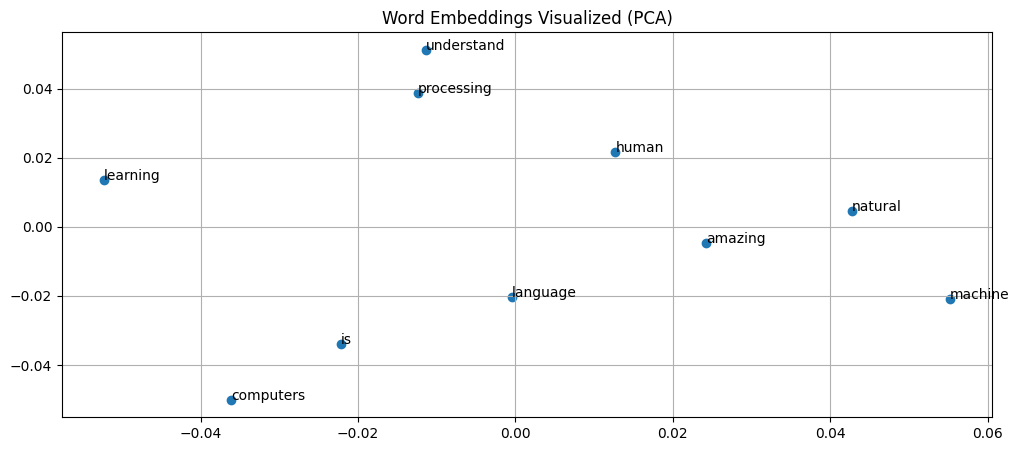

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reduce dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(12, 5))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Embeddings Visualized (PCA)")
plt.grid(True)
plt.show()

## Word2Vec - SkipGram

The **Skip-gram** model predicts **context words** from a given **target word**.

In [15]:
from nltk.tokenize import word_tokenize
text = "Natural language processing and machine learning are parts of artificial intelligence that focus on teaching computers to understand language."
tokens = word_tokenize(text.lower())

# Create a list of tokenized sentences (just one sentence here)
corpus = [tokens]

In [16]:
# sg=1 enables skip-gram (sg=0 for CBOW)
skipgram_model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)

# View vector for a word
print("Vector for 'language':")
print(skipgram_model.wv['language'])

Vector for 'language':
[-1.08305155e-03  4.75558016e-04  1.02131506e-02  1.80252306e-02
 -1.86062995e-02 -1.42406290e-02  1.29234670e-02  1.79579258e-02
 -1.00403260e-02 -7.53288250e-03  1.47603285e-02 -3.07468814e-03
 -9.08628479e-03  1.31166065e-02 -9.72276274e-03 -3.62877245e-03
  5.76195633e-03  1.99417840e-03 -1.65764764e-02 -1.89037770e-02
  1.46263819e-02  1.01347789e-02  1.35330707e-02  1.52576959e-03
  1.27090393e-02 -6.81055943e-03 -1.89888536e-03  1.15471184e-02
 -1.50503460e-02 -7.86948111e-03 -1.50185432e-02 -1.86632760e-03
  1.90819800e-02 -1.46559933e-02 -4.66289930e-03 -3.87800904e-03
  1.61686633e-02 -1.18582435e-02  9.79934484e-05 -9.50444303e-03
 -1.92014296e-02  1.00043621e-02 -1.75376032e-02 -8.78533162e-03
 -6.96902061e-05 -5.90766838e-04 -1.53168142e-02  1.92349199e-02
  9.96869709e-03  1.84711237e-02]


In [17]:
similar = skipgram_model.wv.most_similar('language', topn=5)
for word, score in similar:
    print(f"{word} → similarity: {score:.4f}")

natural → similarity: 0.2706
on → similarity: 0.2108
intelligence → similarity: 0.1671
focus → similarity: 0.1505
are → similarity: 0.1321


## CBOW vs Skip-gram: Word2Vec Architectures

| Feature            | CBOW                          | Skip-gram                      |
|--------------------|-------------------------------|--------------------------------|
| Predicts           | Target word from context      | Context from target word       |
| Training Time      | Faster                        | Slower                         |
| Rare Word Accuracy | Lower                         | Higher                         |
| Suitable For       | Large datasets                | Smaller datasets               |
| Use Case           | Frequent words                | Rare/meaningful relationships  |

We'll now compare both using the same small corpus.


In [18]:
cbow_model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=0)

print("CBOW vector for 'language':")
print(cbow_model.wv['language'])

CBOW vector for 'language':
[-1.08300673e-03  4.73650900e-04  1.02011655e-02  1.80145465e-02
 -1.86072215e-02 -1.42331254e-02  1.29233422e-02  1.79556254e-02
 -1.00377919e-02 -7.52829388e-03  1.47531806e-02 -3.06784199e-03
 -9.08390712e-03  1.31081967e-02 -9.72226635e-03 -3.63483094e-03
  5.75301191e-03  1.98953901e-03 -1.65696070e-02 -1.89034957e-02
  1.46219796e-02  1.01301447e-02  1.35297114e-02  1.53576257e-03
  1.27009721e-02 -6.81421673e-03 -1.89575937e-03  1.15411310e-02
 -1.50499158e-02 -7.86635000e-03 -1.50145432e-02 -1.86346378e-03
  1.90770458e-02 -1.46522485e-02 -4.66034934e-03 -3.87656596e-03
  1.61635019e-02 -1.18559515e-02  9.62351260e-05 -9.50756390e-03
 -1.92005765e-02  1.00028021e-02 -1.75343137e-02 -8.78179166e-03
 -6.64368272e-05 -5.94145677e-04 -1.53139560e-02  1.92302577e-02
  9.96487774e-03  1.84626654e-02]


In [19]:
print("CBOW Similar to 'language':")
for word, score in cbow_model.wv.most_similar('language', topn=5):
    print(f"{word} → similarity: {score:.4f}")

print("\nSkip-gram Similar to 'language':")
for word, score in skipgram_model.wv.most_similar('language', topn=5):
    print(f"{word} → similarity: {score:.4f}")

CBOW Similar to 'language':
natural → similarity: 0.2705
on → similarity: 0.2106
intelligence → similarity: 0.1671
focus → similarity: 0.1502
are → similarity: 0.1322

Skip-gram Similar to 'language':
natural → similarity: 0.2706
on → similarity: 0.2108
intelligence → similarity: 0.1671
focus → similarity: 0.1505
are → similarity: 0.1321


## Summary

- **CBOW** is efficient and good for **frequent words**.
- **Skip-gram** captures **rare words** and **deep relationships** better.
- Use **CBOW** when you have lots of data.
- Use **Skip-gram** when word meaning matters more.

Choose based on your NLP task and dataset size!


# AvgWord2Vec

In [20]:
import nltk
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Ensure you have the necessary NLTK data
nltk.download('punkt', quiet=True)

def avg_word_vectors(sentences, model, num_features):
    """
    Computes the average Word2Vec vector for each sentence.

    Args:
        sentences (list): A list of strings, where each string is a sentence.
        model (gensim.models.Word2Vec): The trained Word2Vec model.
        num_features (int): The dimensionality of the word vectors.

    Returns:
        np.ndarray: A NumPy array where each row is the average vector for a sentence.
                    Returns a zero vector of the correct dimension if a sentence
                    cannot be vectorized (e.g., empty or no words in vocab).
    """
    # Get the vocabulary of the Word2Vec model
    word_set = set(model.wv.index_to_key)

    # Initialize an array to store sentence vectors
    sentence_vectors = np.zeros((len(sentences), num_features))

    # Iterate through each sentence
    for i, sentence in enumerate(sentences):
        # Tokenize the sentence
        tokens = word_tokenize(sentence.lower())

        # Filter tokens to only include words present in the Word2Vec vocabulary
        meaningful_words = [word for word in tokens if word in word_set]

        # Compute the average vector if there are meaningful words
        if meaningful_words:
            # Get the vectors for the meaningful words
            word_vectors = model.wv[meaningful_words]
            # Compute the mean along the rows (axis=0)
            sentence_vectors[i] = np.mean(word_vectors, axis=0)
        else:
            # If no meaningful words, the sentence vector remains the zero vector
            pass # Already initialized to zeros

    return sentence_vectors

# Example Usage:

# Ensure the Word2Vec model is trained on your corpus
# Using the existing 'corpus' variable from the preceding code if it's the list of tokenized sentences
# If 'corpus' is the list of full strings, you'll need to tokenize it first.
# Assuming 'corpus' is a list of lists of tokens from the preceding code:
if 'model' in locals(): # Check if 'model' was defined in the previous code block
    # Example list of raw sentences
    raw_sentences = [
        "This is the first sentence.",
        "Here is another sentence about natural language.",
        "Let's test the average vector."
    ]

    # Tokenize the raw sentences to pass to the function
    tokenized_raw_sentences = [word_tokenize(sentence.lower()) for sentence in raw_sentences]

    # You need to train a Word2Vec model on your actual data ('corpus' from previous steps)
    # For demonstration, let's re-use the existing 'model' object trained earlier.
    # In a real scenario, ensure the model's vocabulary covers your new sentences.

    # Define the vector size used in the model
    vector_size = model.vector_size # Get the vector size from the trained model

    # Get the average vectors for the raw sentences using the trained model
    avg_vectors = avg_word_vectors(raw_sentences, model, vector_size)

    print("\nAverage Word2Vec Vectors for Sentences:")
    for i, sentence in enumerate(raw_sentences):
        print(f"Sentence: \"{sentence}\"")
        print(f"Avg Vector: {avg_vectors[i]}")
        print("-" * 20)
else:
    print("Word2Vec model 'model' not found in the preceding code. Please ensure it is trained.")
    print("Example: model = Word2Vec(sentences=your_tokenized_corpus, vector_size=50, window=5, min_count=1, workers=2)")
    print("Then call avg_word_vectors(your_raw_sentences, model, 50)")


Average Word2Vec Vectors for Sentences:
Sentence: "This is the first sentence."
Avg Vector: [ 0.00855287  0.00015212 -0.01916856 -0.01933109 -0.01229639 -0.00025714
  0.00399483  0.01886394  0.0111687  -0.00858139  0.00055663  0.00992872
  0.01539662 -0.00228845  0.00864684 -0.01162876 -0.00160838  0.0162001
 -0.00472013 -0.01932691  0.01155852 -0.00785964 -0.00244575  0.01996103
 -0.0045127  -0.00951413 -0.01065877  0.01396178 -0.01141774  0.00422733
 -0.01051132  0.01224143  0.00871461  0.00521271 -0.00298217 -0.00549213
  0.01798587  0.01043155 -0.00432504 -0.01894062 -0.0148521  -0.00212748
 -0.00158989 -0.00512582  0.01936544 -0.00091704  0.01174752 -0.01489517
 -0.00501215 -0.01109973]
--------------------
Sentence: "Here is another sentence about natural language."
Avg Vector: [ 0.00345149 -0.00155568 -0.00770314 -0.00564105 -0.01638195 -0.00878703
  0.00440591  0.00938739 -0.00392783 -0.00784759  0.00796532 -0.00020544
  0.00769325  0.00462921 -0.00518604  0.00120227  0.006469

In [21]:
!pip install gensim
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
word_vectors = api.load("word2vec-google-news-300") # glove-wiki-gigaword-100

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [30]:
vector_of_my_word = word_vectors['Bangladesh']
vector_of_my_word

array([-0.22753906,  0.08789062,  0.00386047,  0.12207031, -0.13769531,
       -0.03442383, -0.07128906, -0.23632812, -0.29882812, -0.01086426,
       -0.03564453, -0.39648438,  0.37890625, -0.03222656,  0.06079102,
        0.00927734, -0.36523438, -0.17382812,  0.015625  ,  0.27148438,
       -0.08789062, -0.48828125, -0.07958984, -0.02038574,  0.19921875,
       -0.02868652, -0.10009766, -0.08300781, -0.05444336,  0.13183594,
       -0.43554688, -0.27539062, -0.37304688, -0.07617188, -0.12353516,
        0.12207031, -0.40625   , -0.13183594,  0.17285156,  0.05786133,
       -0.08007812,  0.31640625,  0.35546875,  0.1875    , -0.06225586,
        0.01623535, -0.32617188, -0.00970459,  0.07910156,  0.04711914,
       -0.02978516, -0.10058594,  0.125     ,  0.07080078, -0.19921875,
       -0.17773438, -0.39453125,  0.01226807, -0.12207031, -0.18457031,
       -0.01208496, -0.25195312, -0.26953125, -0.02807617,  0.17675781,
        0.09130859,  0.16308594,  0.13476562,  0.15527344, -0.04

In [31]:
vector_of_my_word.shape

(300,)

In [32]:
word_vectors.most_similar('Bangladesh')

[('Bangaldesh', 0.7588826417922974),
 ('Sri_Lanka', 0.7444459199905396),
 ('Bangladeshi', 0.7186588644981384),
 ('Dhaka', 0.7109648585319519),
 ('Pakistan', 0.7073667049407959),
 ('Bangla_desh', 0.6974431276321411),
 ('Chittagong', 0.678379237651825),
 ('India', 0.6527796983718872),
 ("B'desh", 0.6462721824645996),
 ('Bangladeshs', 0.6454333066940308)]

In [33]:
word_vectors.most_similar("Question")

[('Q.', 0.6834139823913574),
 ('Answer', 0.6393887996673584),
 ('QUESTION', 0.6329168677330017),
 ('Q', 0.6302560567855835),
 ('Non_Cinematical', 0.599972665309906),
 ('question', 0.5829653143882751),
 ('BusinessObjects_Intelligent', 0.5552016496658325),
 ('Ask', 0.5339207053184509),
 ("TODAY_'S_QUESTION", 0.5263899564743042),
 ('Trivia_Question', 0.5250352025032043)]

In [34]:
word_vectors.most_similar("happy")

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [35]:
word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]

In [37]:
word_vectors.similarity("Cricket", "Football")

0.53791726

In [38]:
word_vectors.similarity("Sports", "Football")

0.60699266